In [1]:
from ase import *
from gpaw import *

# -------------------------------------------------------------
# Bulk Configuration
# -------------------------------------------------------------
layer = Atoms(
    [
    Atom('Mo', ( 1.5802, 0.912328895373, 6.1475 )),
    Atom('S', ( 1.5802, -0.912328895373, 4.561445 )),
    Atom('S', ( 1.5802, -0.912328895373, 7.733555 )),
    ],
    cell=[(1.5802, -2.73698668612, 0.0), (1.5802, 2.73698668612, 0.0), (0.0, 0.0, 12.295)],
    pbc=[True,True,True],
    )

In [2]:
calc = GPAW(mode=PW(600),
            xc='PBE',
            setups={'Mo': '6'},
            parallel={'band': 1, 'domain': 1},
            occupations=FermiDirac(width=0.01),
            kpts=(16, 16, 1),
            verbose=True
            )


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  1.2.0
 |___|_|             

User:   titan@Titan
Date:   Sat Feb 24 16:05:31 2018
Arch:   x86_64
Pid:    5264
Python: 2.7.12
gpaw:   /usr/local/lib/python2.7/dist-packages/gpaw
_gpaw:  /usr/local/lib/python2.7/dist-packages/_gpaw.so
ase:    /home/titan/.local/lib/python2.7/site-packages/ase (version 3.15.0)
numpy:  /usr/local/lib/python2.7/dist-packages/numpy (version 1.13.3)
scipy:  /usr/local/lib/python2.7/dist-packages/scipy (version 1.0.0)
units:  Angstrom and eV
cores:  1

Input parameters:
  kpts: [16 16  1]
  mode: {ecut: 600.0,
         name: pw}
  occupations: {name: fermi-dirac,
                width: 0.01}
  setups: {Mo: 6}
  verbose: True
  xc: PBE



In [3]:
layer.set_calculator(calc)

In [4]:
layer.get_potential_energy()

System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

Mo-setup:
  name: Molybdenum
  id: 777abf82e11571d8662b25ce786408fd
  Z: 42
  valence: 6
  core: 36
  charge: 0.0
  file: /home/titan/gpaw-setups-0.9.20000/Mo.6.PBE.gz
  cutoffs: 1.32(comp), 2.62(filt), 3.48(core), lmax=2
  valence states:
                energy  radius
    5s(1.00)    -4.084   1.482
    5p(0.00)    -1.044   1.482
    4d(5.00)    -3.754   1.323
    *s          23.128   1.482
    *p          26.167   1.482
    *d          23.458   1.323

  Using partial waves for Mo as LCAO basis

S-setup:
  name: Sulfur
  id: ca434db9faa07220b7a1d8cb6886b7a9
  Z: 16
  valence: 6
  core: 10
  charge: 0.0
  file: /home/titan/gpaw-setups-0.9.20000/S.PBE.gz
  cutoffs: 0.76(comp), 1.77(filt), 1.66(core), lmax=2
  valence states:
                energy  radius
    3s(2.00)   -17.254   0.974
    3p(4.00)    -7.008   0.979
    *s           9.957   0.974
    *p          20.203   0.979
    *d       

iter:  46  16:08:57  -6.10  -4.47   -21.493470    0             
iter:  47  16:09:04  -6.15  -4.87   -21.493470    0             
iter:  48  16:09:09  -6.27  -4.97   -21.493471    0             
iter:  49  16:09:16  -6.39  -5.03   -21.493471    0             
iter:  50  16:09:22  -6.47  -5.10   -21.493471    0             
iter:  51  16:09:28  -6.56  -5.09   -21.493471    0             
iter:  52  16:09:35  -6.56  -4.86   -21.493471    0             
iter:  53  16:09:40  -6.68  -4.97   -21.493472    0             
iter:  54  16:09:45  -6.77  -4.81   -21.493472    0             
iter:  55  16:09:51  -6.90  -4.96   -21.493472    0             
iter:  56  16:09:57  -6.94  -4.98   -21.493472    0             
iter:  57  16:10:03  -7.03  -4.96   -21.493472    0             
iter:  58  16:10:09  -7.06  -4.97   -21.493472    0             
iter:  59  16:10:14  -7.07  -4.69   -21.493472    0             
iter:  60  16:10:20  -7.17  -5.06   -21.493472    0             
iter:  61  16:10:26  -7.3

-21.493471931141599

In [5]:
calc.write('MoS2_gs.gpw')

Writing to MoS2_gs.gpw (mode='')



In [6]:
from gpaw.spinorbit import get_spinorbit_eigenvalues
from ase.dft.kpoints import bandpath
G = [0, 0, 0]
K = [1 / 3., 1 / 3., 0]
M = [0.5, 0, 0]
M_ = [-0.5, 0, 0]
K_ = [-1 / 3., -1 / 3., 0]
kpts, x, X = bandpath([M, K, G, K_, M_], layer.cell, npoints=1000)
calc = GPAW('MoS2_gs.gpw', kpts=kpts, symmetry='off', fixdensity=True)
calc.get_potential_energy()


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  1.2.0
 |___|_|             

User:   titan@Titan
Date:   Sat Feb 24 16:10:38 2018
Arch:   x86_64
Pid:    5264
Python: 2.7.12
gpaw:   /usr/local/lib/python2.7/dist-packages/gpaw
_gpaw:  /usr/local/lib/python2.7/dist-packages/_gpaw.so
ase:    /home/titan/.local/lib/python2.7/site-packages/ase (version 3.15.0)
numpy:  /usr/local/lib/python2.7/dist-packages/numpy (version 1.13.3)
scipy:  /usr/local/lib/python2.7/dist-packages/scipy (version 1.0.0)
units:  Angstrom and eV
cores:  1

Reading from MoS2_gs.gpw
Read energy, free_energy
Reading input parameters:
  kpts: [16 16  1]
  mode: {ecut: 600.0,
         name: pw}
  occupations: {name: fermi-dirac,
                width: 0.01}
  setups: {Mo: 6}
  verbose: True
  xc: PBE

Initialize ...

Mo-setup:
  name: Molybdenum
  id: 777abf82e11571d8662b25ce786408fd
  Z: 42
  valence: 6
  core: 36
  charge: 0.0
  file: /home/titan/gpaw-setups-0.9.20000/Mo.6.PBE.gz

... initialized

Initializing position-dependent things.

Creating initial wave functions:
  17 bands from LCAO basis set

                  
                  
                  
                  
                  
       S          
         Mo       
                  
                  
       S          
                  
                  
                  
                  

Positions:
   0 Mo     1.580200    0.912329    6.147500
   1 S      1.580200   -0.912329    4.561445
   2 S      1.580200   -0.912329    7.733555

Unit cell:
           periodic     x           y           z      points  spacing
  1. axis:    yes    1.580200   -2.736987    0.000000    15     0.1825
  2. axis:    yes    1.580200    2.736987    0.000000    15     0.1825
  3. axis:    yes    0.000000    0.000000   12.295000    70     0.1756

                     log10-error:    total        iterations:
           time      wfs    density  energy       fermi  poisson
iter:   1  16:12:04  +2.18          -21.

-21.539130451661705

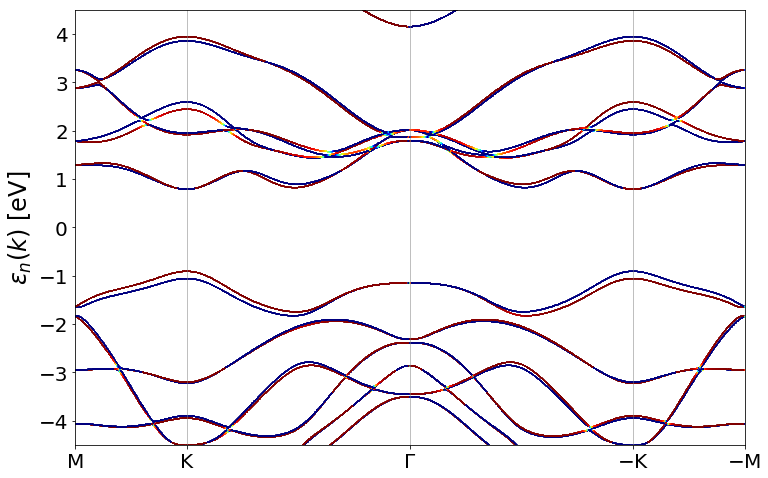

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(12,8))
e_kn = np.array([calc.get_eigenvalues(kpt=k)
                 for k in range(len(calc.get_ibz_k_points()))])
e_nk = e_kn.T
e_nk -= calc.get_fermi_level()
# for e_k in e_nk:
#     plt.plot(x, e_k, '--', c='0.5')

e_nk, s_kvn = get_spinorbit_eigenvalues(calc, return_spin=True)
e_nk -= calc.get_fermi_level()
s_nk = (s_kvn[:, 2].T + 1.0) / 2.0

plt.xticks(X, [r'$\mathrm{M}$', r'$\mathrm{K}$', r'$\Gamma$', 
               r'$\mathrm{-K}$', r'$\mathrm{-M}$'], size=20)
plt.yticks(size=20)
for i in range(len(X))[1:-1]:
    plt.plot(2 * [X[i]], [1.1 * np.min(e_nk), 1.1 * np.max(e_nk)],
             c='0.5', linewidth=0.5)
i=0
for e_k in e_nk:
    plt.scatter(x,e_k,c=plt.cm.jet(s_kvn[i]),marker='+',s=2)
    i+=1


plt.ylabel(r'$\varepsilon_n(k)$ [eV]', size=24)
plt.axis([0, x[-1], -4.5, 4.5])
# plt.show()
plt.savefig('MoS2_bands_PBE_SOC_Hubbard(U=6eV).png')